# SON: Zhu-Tokita-Takenouchi-Kim (ZTTK) Syndrome (OMIM #617140)

[Zhu-Tokita-Takenouchi-Kim Syndrome (OMIM #617140)](https://omim.org/entry/617140) is a rare developmental disorder caused by pathogenic variants in the *SON* gene. This syndrome, also known as **ZTTK Syndrome**, is characterized by a range of symptoms including intellectual disability, developmental delays, and craniofacial abnormalities. The disease is associated mainly with protein-truncating variants of the *SON* gene, and it is inherited in an autosomal dominant manner.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


### SON
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SON.

In [2]:
gene_symbol = 'SON'
mane_tx_id = 'NM_138927.4'
mane_protein_id = 'NP_620305.2'

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.23') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize() 

Individuals Processed: 100%|██████████| 52/52 [00:49<00:00,  1.06 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
31,Hypotonia
30,Feeding difficulties
27,Delayed speech and language development
26,Short stature
24,Ventriculomegaly
24,Downslanted palpebral fissures
24,Seizure
22,Low-set ears
22,"Intellectual disability, severe"
21,Strabismus


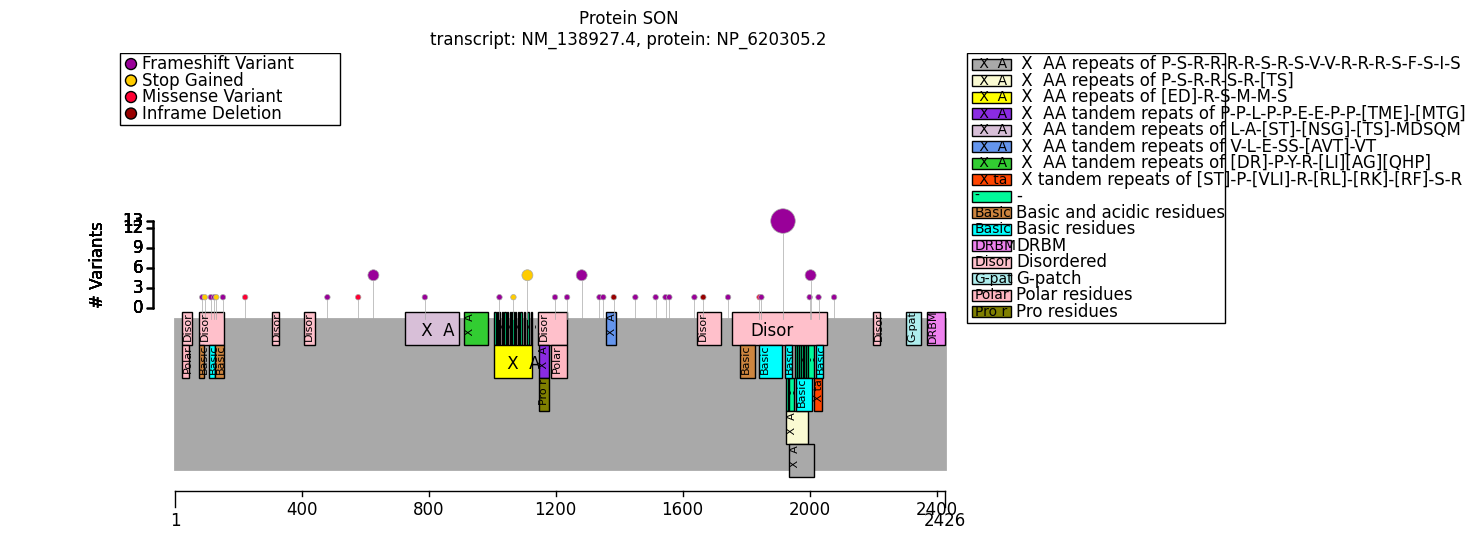

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
son_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
son_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
0,Disordered,Region,25 - 56,
0,Polar residues,Compositional bias,25 - 45,
6,Disordered,Region,78 - 155,p.Gln96Ter; p.Gln132Ter; p.Lys128AsnfsTer21; p.Asp153IlefsTer4; p.Asn116LysfsTer32; p.Ser90ValfsTer59
1,Basic and acidic residues,Compositional bias,78 - 91,p.Ser90ValfsTer59
2,Basic residues,Compositional bias,108 - 127,p.Lys128AsnfsTer21; p.Asn116LysfsTer32
2,Basic and acidic residues,Compositional bias,129 - 155,p.Gln132Ter; p.Asp153IlefsTer4
0,Disordered,Region,306 - 328,
0,Disordered,Region,407 - 442,
1,17 X 10 AA tandem repeats of L-A-[ST]-[NSG]-[TS]-MDSQM,Region,727 - 895,p.Ser789AlafsTer8
0,11 X 7 AA tandem repeats of [DR]-P-Y-R-[LI][AG][QHP],Region,913 - 988,


In [7]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
13,21_33554981_33554985_CAGTT_C,c.5753_5756del (p.Val1918GlufsTer87),3,frameshift
2,21_33555240_33555241_TG_T,c.6010del (p.Val2004TrpfsTer2),3,frameshift
2,21_33551111_33551113_CAG_C,c.1881_1882del (p.Val629AlafsTer56),3,frameshift
2,21_33553078_33553083_TGTATG_T,c.3852_3856del (p.Met1284IlefsTer2),3,frameshift
2,SO:1000029_HGNC:11183_SON,SV involving SON (p.?),,chromosomal deletion
2,21_33552565_33552565_C_T,c.3334C>T (p.Arg1112Ter),3,stop gained
1,21_33553905_33553906_TG_T,c.4678del (p.Glu1560LysfsTer63),3,frameshift
1,21_33554759_33554759_C_A,c.5528C>A (p.Ser1843Tyr),3,missense
1,21_33554144_33554149_AACATG_A,c.4919_4923del (p.Asp1640GlyfsTer7),3,frameshift
1,21_33553282_33553283_GC_G,c.4055del (p.Pro1352GlnfsTer14),3,frameshift


## Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
from gpsea.analysis.pcats import configure_hpo_term_analysis

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_key
from gpsea.view import MtcStatsViewer

c5753_5756del = variant_key('21_33554981_33554985_CAGTT_C') # c.5753_5756del	p.Val1918GlufsTer87
c5753_5756del_clf = monoallelic_classifier(
    a_predicate=c5753_5756del,
    b_predicate=~c5753_5756del,
    a_label="c.5753_5756del",
    b_label="Other"
)
c5753_5756del_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=c5753_5756del_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(c5753_5756del_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,25
HMF03,Skipping term because of a child term with the same individual counts,11
HMF08,Skipping general term,52
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,52


In [10]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, c5753_5756del_result)

Allele group                                       c.5753_5756del          \
                                                            Count Percent   
Strabismus [HP:0000486]                                      2/11     18%   
Ventriculomegaly [HP:0002119]                                4/11     36%   
Low-set ears [HP:0000369]                                    5/12     42%   
Seizure [HP:0001250]                                         5/13     38%   
Hypotonia [HP:0001252]                                       7/13     54%   
Decreased body weight [HP:0004325]                            4/4    100%   
Intellectual disability [HP:0001249]                        12/12    100%   
Neurodevelopmental abnormality [HP:0012759]                 13/13    100%   
Abnormal cerebral ventricle morphology [HP:0002...            4/4    100%   
Abnormal brain morphology [HP:0012443]                        6/6    100%   
Morphological central nervous system abnormalit...            6/6    100%   
Abnormal ocular adnexa morphology [HP:0030669]                8/8    100%   
Downslanted palpebral fissures [HP:0000494]                  6/11     55%   
Slanting of the palpebral fissure [HP:0200006]                6/6    100%   
Abnormal eyelid morphology [HP:0000492]                       8/8    100%   
Abnormal location of ears [HP:0000357]                        8/8    100%   
Delayed speech and language development [HP:000...            9/9    100%   
Abnormal communication [HP:0034434]                           9/9    100%   
Abnormal muscle tone [HP:0003808]                             7/7    100%   
Abnormal conjugate eye movement [HP:0000549]                  2/2    100%   
Visual impairment [HP:0000505]                                5/5    100%   
Short stature [HP:0004322]                                    7/7    100%   
Intellectual disability, severe [HP:0010864]                  7/7    100%   
Feeding difficulties [HP:0011968]                            8/12     67%   
Abdominal symptom [HP:0011458]                                8/8    100%   
Abnormal cerebral morphology [HP:0002060]                     3/3    100%   

Allele group                                        Other          \
                                                    Count Percent   
Strabismus [HP:0000486]                             19/36     53%   
Ventriculomegaly [HP:0002119]                       20/33     61%   
Low-set ears [HP:0000369]                           17/31     55%   
Seizure [HP:0001250]                                19/38     50%   
Hypotonia [HP:0001252]                              24/38     63%   
Decreased body weight [HP:0004325]                  21/21    100%   
Intellectual disability [HP:0001249]                37/38     97%   
Neurodevelopmental abnormality [HP:0012759]         38/38    100%   
Abnormal cerebral ventricle morphology [HP:0002...  20/20    100%   
Abnormal brain morphology [HP:0012443]              28/28    100%   
Morphological central nervous system abnormalit...  28/28    100%   
Abnormal ocular adnexa morphology [HP:0030669]      26/26    100%   
Downslanted palpebral fissures [HP:0000494]         18/36     50%   
Slanting of the palpebral fissure [HP:0200006]      18/18    100%   
Abnormal eyelid morphology [HP:0000492]             25/25    100%   
Abnormal location of ears [HP:0000357]              19/19    100%   
Delayed speech and language development [HP:000...  18/18    100%   
Abnormal communication [HP:0034434]                 18/18    100%   
Abnormal muscle tone [HP:0003808]                   24/24    100%   
Abnormal conjugate eye movement [HP:0000549]        19/19    100%   
Visual impairment [HP:0000505]                      16/16    100%   
Short stature [HP:0004322]                          20/20    100%   
Intellectual disability, severe [HP:0010864]        15/16     94%   
Feeding difficulties [HP:0011968]                   22/36     61%   
Abdominal symptom [HP:0011458]                   

In [11]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(effect=VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf = monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="missense",
    b_label="Other"
)
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, missense_result)

Allele group                                       missense          Other  \
                                                      Count Percent  Count   
Intellectual disability [HP:0001249]                    1/2     50%  48/48   
Ventriculomegaly [HP:0002119]                           0/3      0%  24/41   
Intellectual disability, severe [HP:0010864]            1/2     50%  21/21   
Epicanthus [HP:0000286]                                 2/3     67%   9/44   
Seizure [HP:0001250]                                    0/3      0%  24/48   
Strabismus [HP:0000486]                                 0/3      0%  21/44   
Feeding difficulties [HP:0011968]                       1/3     33%  29/45   
Low-set ears [HP:0000369]                               1/3     33%  21/40   
Downslanted palpebral fissures [HP:0000494]             1/3     33%  23/44   
Decreased body weight [HP:0004325]                      2/2    100%  23/23   
Neurodevelopmental abnormality [HP:0012759]             2/2    100%  49/49   
Abnormal brain morphology [HP:0012443]                  2/2    100%  32/32   
Morphological central nervous system abnormalit...      2/2    100%  32/32   
Abnormal ocular adnexa morphology [HP:0030669]          2/2    100%  32/32   
Slanting of the palpebral fissure [HP:0200006]          1/1    100%  23/23   
Abnormal eyelid morphology [HP:0000492]                 2/2    100%  31/31   
Abnormal location of ears [HP:0000357]                  1/1    100%  26/26   
Delayed speech and language development [HP:000...      2/2    100%  25/25   
Abnormal communication [HP:0034434]                     2/2    100%  25/25   
Hypotonia [HP:0001252]                                  2/3     67%  29/48   
Abnormal muscle tone [HP:0003808]                       2/2    100%  29/29   
Short stature [HP:0004322]                              1/1    100%  26/26   
Abdominal symptom [HP:0011458]                          1/1    100%  29/29   
Abnormal cerebral morphology [HP:0002060]               2/2    100%  20/20   

Allele group                                                                   \
                                                   Percent Corrected p values   
Intellectual disability [HP:0001249]                  100%           0.695652   
Ventriculomegaly [HP:0002119]                          59%           0.695652   
Intellectual disability, severe [HP:0010864]          100%           0.695652   
Epicanthus [HP:0000286]                                20%           0.793710   
Seizure [HP:0001250]                                   50%           0.969473   
Strabismus [HP:0000486]                                48%           0.969473   
Feeding difficulties [HP:0011968]                      64%           1.000000   
Low-set ears [HP:0000369]                              52%           1.000000   
Downslanted palpebral fissures [HP:0000494]            52%           1.000000   
Decreased body weight [HP:0004325]                    100%           1.000000   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Abnormal brain morphology [HP:0012443]                100%           1.000000   
Morphological central nervous system abnormalit...    100%           1.000000   
Abnormal ocular adnexa morphology [HP:0030669]        100%           1.000000   
Slanting of the palpebral fissure [HP:0200006]        100%           1.000000   
Abnormal eyelid morphology [HP:0000492]               100%           1.000000   
Abnormal location of ears [HP:0000357]                100%           1.000000   
Delayed speech and language development [HP:000...    100%           1.000000   
Abnormal communication [HP:0034434]                   100%           1.000000   
Hypotonia [HP:0001252]                                 60%           1.000000   
Abnormal muscle tone [HP:0003808]                     100%           1.000000   
Short stature [HP:0004322]                            100%           1.000000   
Abdominal symptom [HP:00114

In [13]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Ventriculomegaly [HP:0002119]                        8/20     40%  16/24   
Generalized joint hypermobility [HP:0002761]         6/25     24%  11/26   
Low-set ears [HP:0000369]                            9/21     43%  13/22   
Feeding difficulties [HP:0011968]                   17/24     71%  13/24   
Hypotonia [HP:0001252]                              17/25     68%  14/26   
Intellectual disability, severe [HP:0010864]        12/12    100%  10/11   
Strabismus [HP:0000486]                             11/22     50%  10/25   
Seizure [HP:0001250]                                11/25     44%  13/26   
Decreased body weight [HP:0004325]                  11/11    100%  14/14   
Intellectual disability [HP:0001249]                24/24    100%  25/26   
Neurodevelopmental abnormality [HP:0012759]         25/25    100%  26/26   
Abnormal cerebral ventricle morphology [HP:0002...    8/8    100%  16/16   
Abnormal brain morphology [HP:0012443]              16/16    100%  18/18   
Morphological central nervous system abnormalit...  16/16    100%  18/18   
Abnormal ocular adnexa morphology [HP:0030669]      15/15    100%  19/19   
Downslanted palpebral fissures [HP:0000494]         11/22     50%  13/25   
Slanting of the palpebral fissure [HP:0200006]      11/11    100%  13/13   
Abnormal eyelid morphology [HP:0000492]             14/14    100%  19/19   
Abnormal location of ears [HP:0000357]              11/11    100%  16/16   
Delayed speech and language development [HP:000...  13/13    100%  14/14   
Abnormal communication [HP:0034434]                 13/13    100%  14/14   
Abnormal muscle tone [HP:0003808]                   17/17    100%  14/14   
Abnormal conjugate eye movement [HP:0000549]        11/11    100%  10/10   
Visual impairment [HP:0000505]                        8/8    100%  13/13   
Short stature [HP:0004322]                          15/15    100%  12/12   
Abdominal symptom [HP:0011458]                      17/17    100%  13/13   
Abnormal cerebral morphology [HP:0002060]           12/12    100%  10/10   

Sex                                                                            \
                                                   Percent Corrected p values   
Ventriculomegaly [HP:0002119]                          67%                1.0   
Generalized joint hypermobility [HP:0002761]           42%                1.0   
Low-set ears [HP:0000369]                              59%                1.0   
Feeding difficulties [HP:0011968]                      54%                1.0   
Hypotonia [HP:0001252]                                 54%                1.0   
Intellectual disability, severe [HP:0010864]           91%                1.0   
Strabismus [HP:0000486]                                40%                1.0   
Seizure [HP:0001250]                                   50%                1.0   
Decreased body weight [HP:0004325]                    100%                1.0   
Intellectual disability [HP:0001249]                   96%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormal cerebral ventricle morphology [HP:0002...    100%                1.0   
Abnormal brain morphology [HP:0012443]                100%                1.0   
Morphological central nervous system abnormalit...    100%                1.0   
Abnormal ocular adnexa morphology [HP:0030669]        100%                1.0   
Downslanted palpebral fissures [HP:0000494]            52%                1.0   
Slanting of the palpebral fissure [HP:0200006]        100%                1.0   
Abnormal eyelid morphology [HP:0000492]               100%                1.0   
Abnormal location of ears [HP:0000357]                100%                1.0   
Delayed speech and language development [HP:000...    100%                1.0   
Abnormal comm

# Summary

In [17]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=c5753_5756del_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = """Dingemans et al (2020) suggested a different pathomechanism for missense variants, but only our cohort only contains 3 individuals
 with missense variants, so there is no statistical power \\cite{PMID_34521999}."""

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [18]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
missense,Other,24,0
Genotype (A),Genotype (B),Tests performed,Significant tests
c.5753_5756del,Other,26,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,27,0


In [16]:
summarizer.process_latex(report=report, protein_fig=son_fig)

Figure saved to ../../supplement/img/SON_protein_diagram-draft.pdf
Output to ../../supplement/tex/SON_summary_draft.tex
